# 导入模块 创建随机数据
因为torch只能处理二维的数据，所以我们用torch.unsqueeze给伪数据添加一个维度，dim表示添加在第几维

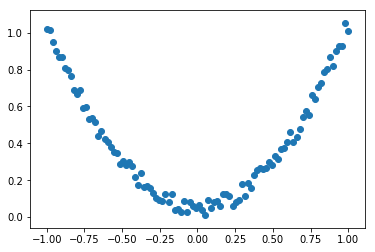

In [1]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

# unsqueeze二维数据  squeeze压缩
# 因为torch只能处理二维的数据，所以我们用torch.unsqueeze给伪数据添加一个维度，dim表示添加在第几维
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.1*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)

# 画图
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

# 定义神经网络模型
net2为torch的快速搭建法

In [2]:
class Net(torch.nn.Module):  # 继承 torch 的 Module
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()     # 继承 __init__ 功能
        # 定义每层用什么样的形式
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # 隐藏层线性输出
        self.predict = torch.nn.Linear(n_hidden, n_output)   # 输出层线性输出

    def forward(self, x):   # 这同时也是 Module 中的 forward 功能
        # 正向传播输入值, 神经网络分析出输出值
        x = torch.relu(self.hidden(x))      # 激励函数(隐藏层的线性值)
        x = self.predict(x)             # 输出值
        return x

net = Net(n_feature=1, n_hidden=10, n_output=1)

net2 = torch.nn.Sequential(
    torch.nn.Linear(1, 10),
    torch.nn.ReLU(),
    torch.nn.Linear(10, 1)
)

print(net,net2)  # net 的结构


Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
) Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=1, bias=True)
)


# 训练网络
训练网络之前我们需要先定义优化器和损失函数

我们要把网络的参数net.parameters()传入优化器中，并设置学习率（一般小于1）。

由于优化器是基于梯度来优化参数的，并且梯度会保存在其中。所以在每次优化前要通过optimizer.zero_grad()把梯度置零，然后再后向传播及更新。

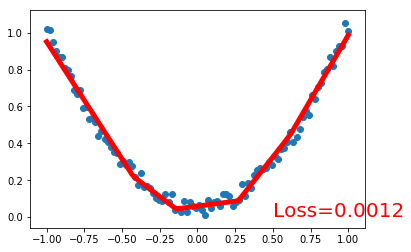

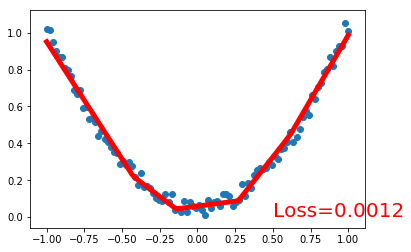

In [3]:
# 训练网络之前我们需要先定义优化器和损失函数
# optimizer 是训练的工具
# Stochastic Gradient Descent (SGD) 随机梯度下降
optimizer = torch.optim.SGD(net2.parameters(), lr=0.2)  # 传入 net 的所有参数, 学习率
# 均方误差(MSE)
loss_func = torch.nn.MSELoss()      # 预测值和真实值的误差计算公式 (均方差)

import matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display
    
plt.ion()   # something about plotting

for t in range(1000):
    prediction = net2(x)     # input x and predict based on x

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 100 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        if is_ipython: #动态显示
            display.clear_output(wait=True)
            display.display(plt.gcf())
        plt.pause(0.01)

plt.ioff()
plt.show()